<a href="https://colab.research.google.com/github/Sruthi-Shivaram/Ml_Minor/blob/main/Expt_4_NB_LDA/ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Sruthi Shivaramakrishnan

Branch:ETRX

UID:2019110059

Course: Minor ML

Objective:  
(i) Apply Naive bayes classifier for any dataset given in Examples of data sets for Text analysis and NLP 
projects.pdf   file given in canvas 
 
(ii) Apply and compare Linear Discriminating Analysis with Naive bayes classifiers w.r.t. error, 
specificity and sensitivity 
 

Loading the data and performing analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_coord,tweet_created,tweet_location,user_timezone,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1533 non-null   object 
 12  tweet_created                 14178 non-null  object 
 13  t

In [ ]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13107
tweet_created                     462
tweet_location                   4623
user_timezone                    4795
Unnamed: 15                     14242
Unnamed: 16                     14601
Unnamed: 17                     14632
Unnamed: 18                     14636
Unnamed: 19                     14637
Unnamed: 20                     14639
dtype: int64

In [ ]:
data.drop(['Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','airline_sentiment_gold','negativereason_gold'], axis=1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,5.695877e+17,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,5.695874e+17,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,5.695872e+17,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,5.695872e+17,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [ ]:
new_data=data[['text','airline','airline_sentiment_confidence','airline_sentiment']]
new_data.head()

,text,airline,airline_sentiment_confidence,airline_sentiment
0,@VirginAmerica What @dhepburn said.,Virgin America,1.0000,neutral
1,@VirginAmerica plus you've added commercials t...,Virgin America,0.3486,positive
2,@VirginAmerica I didn't today... Must mean I n...,Virgin America,0.6837,neutral
3,@VirginAmerica it's really aggressive to blast...,Virgin America,1.0000,negative
4,@VirginAmerica and it's a really big bad thing...,Virgin America,1.0000,negative


In [ ]:
new_data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

# Visualising the original data

The original data has 3 classes- negative,neutral and positive

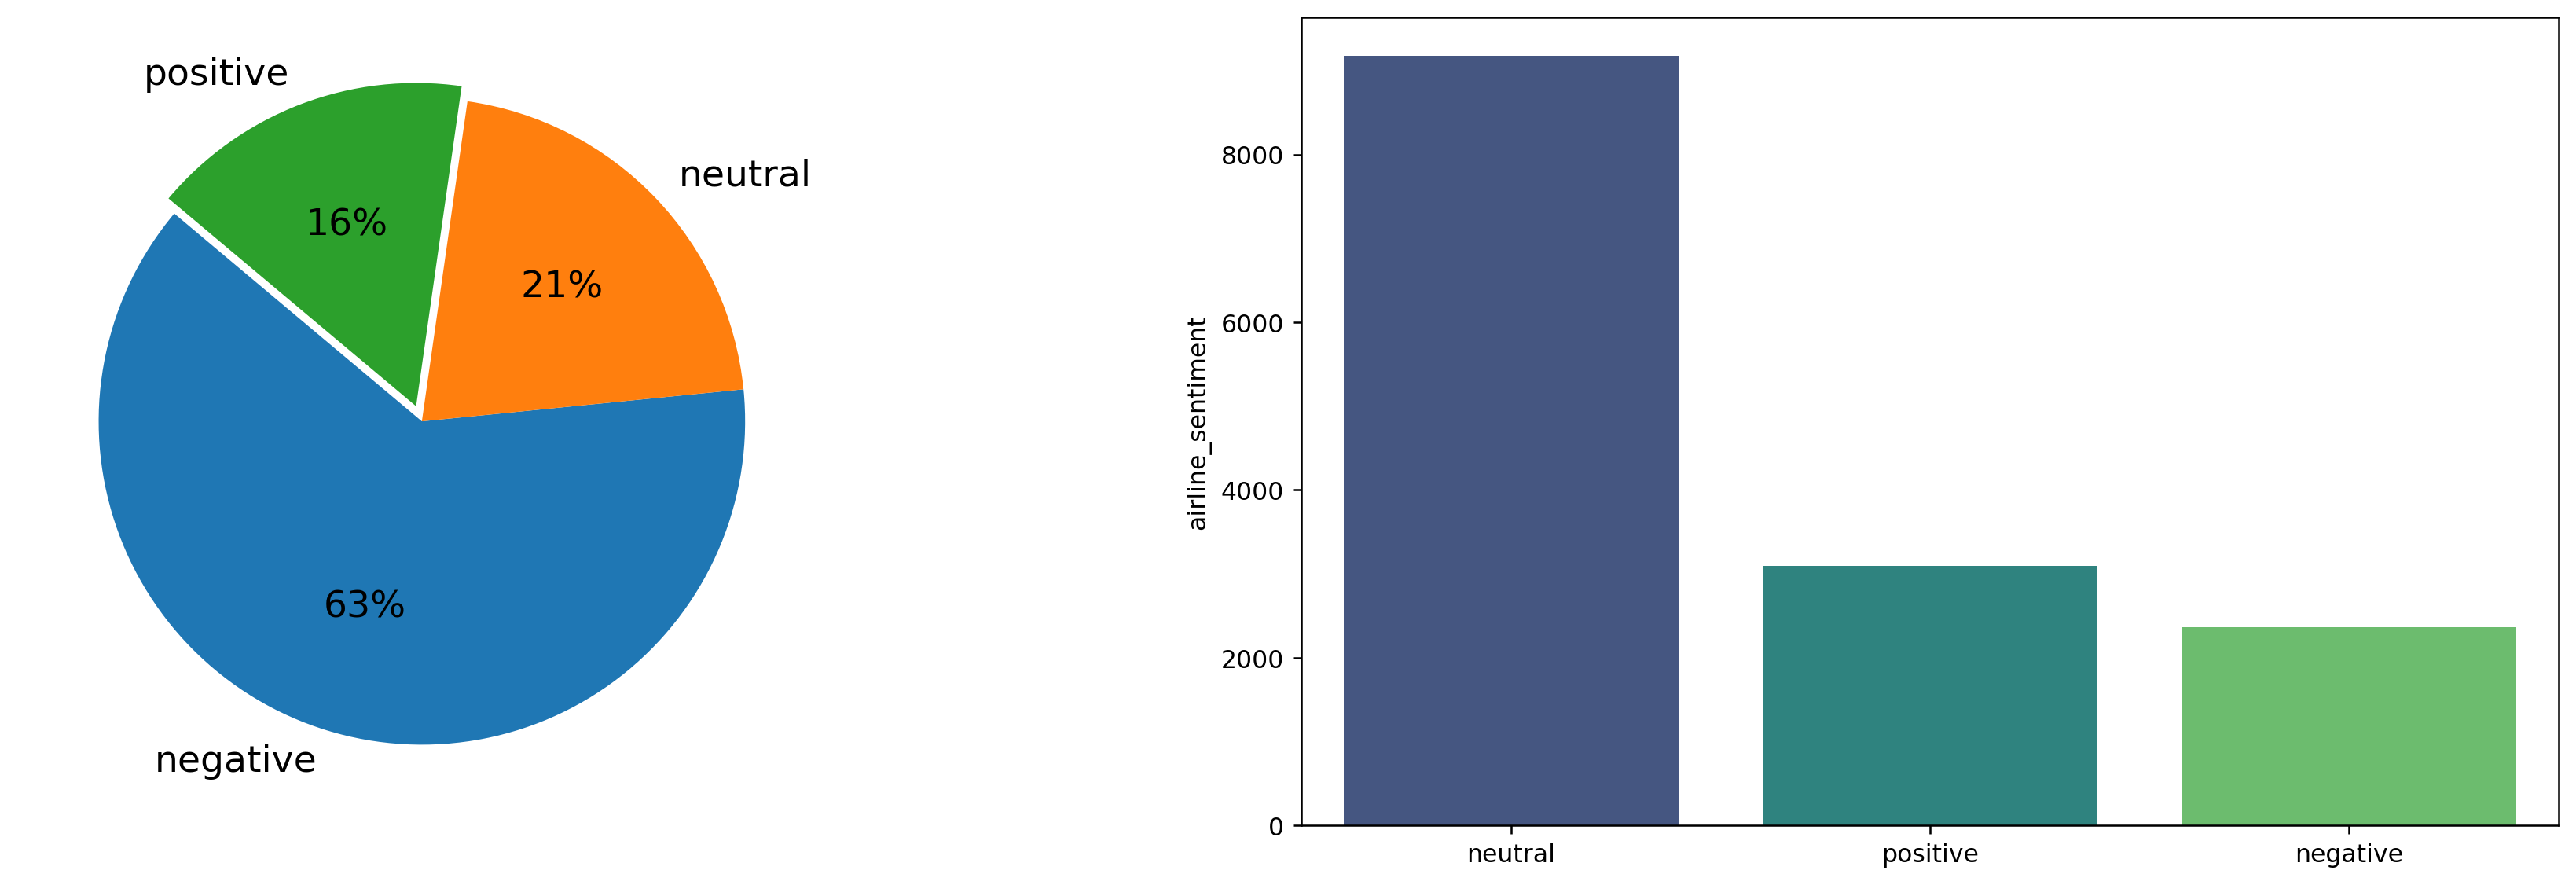

In [ ]:
labels = ['negative', 'neutral','positive']
sizes = [9178, 3099, 2363]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, autopct='%1.0f%%', explode=[0, 0,0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = new_data['airline_sentiment'].unique(), y = new_data['airline_sentiment'].value_counts(), palette= 'viridis')

plt.show()

The above analysis shows there are 63% negative, 21% neutral and 16% positive sentiments.

In [ ]:
new_data['Total Words'] = new_data['text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

new_data['Total Chars'] = new_data["text"].apply(count_total_words)

<ipython-input-10-179a4e52a45c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Total Words'] = new_data['text'].apply(lambda x: len(x.split()))
<ipython-input-10-179a4e52a45c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Total Chars'] = new_data["text"].apply(count_total_words)


In [ ]:
new_data['airline_sentiment'] = new_data['airline_sentiment'].replace({'negative':0,'neutral':1,'positive':1})

<ipython-input-11-4e1cd0010f11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['airline_sentiment'] = new_data['airline_sentiment'].replace({'negative':0,'neutral':1,'positive':1})


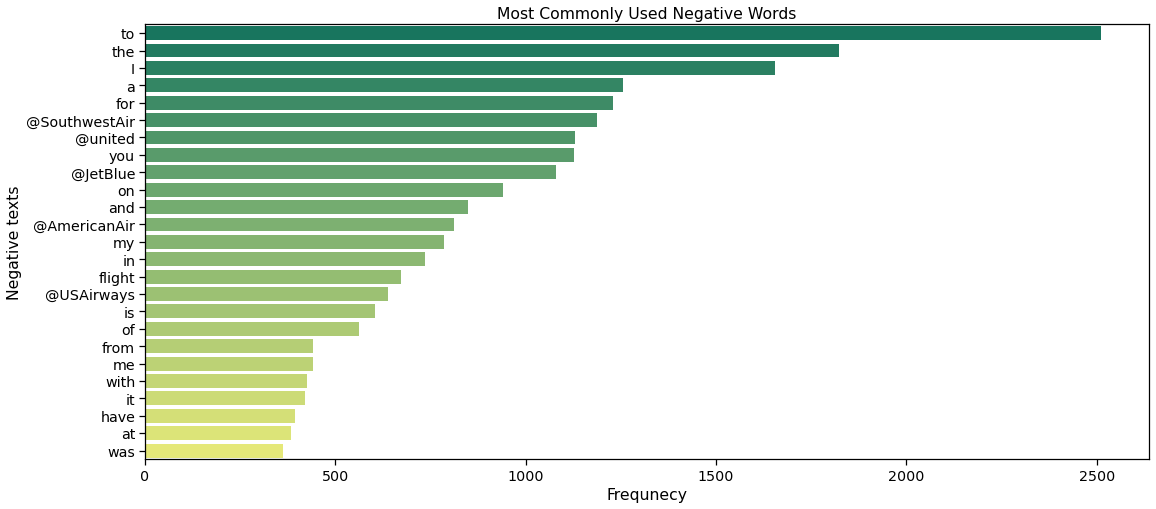

In [ ]:
all_neutral = []
for sentence in new_data[new_data['airline_sentiment'] == 1]['text'].to_list():
    for word in sentence.split():
        all_neutral.append(word)

df = pd.DataFrame(Counter(all_neutral).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Negative Words")
plt.xlabel("Frequnecy")
plt.ylabel("Negative texts")
plt.show()

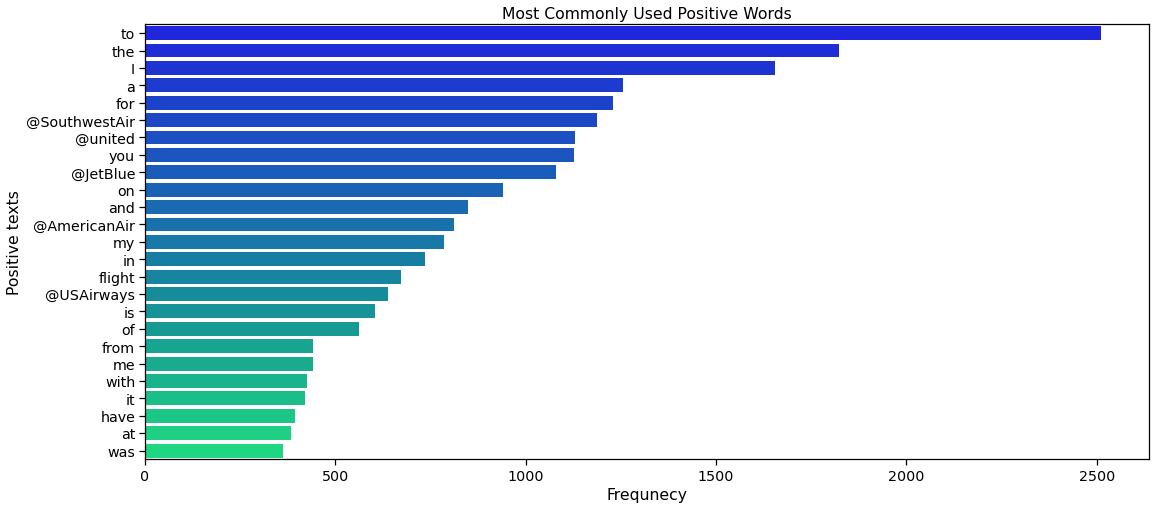

In [ ]:
all_positive = []
for sentence in new_data[new_data['airline_sentiment'] == 1]['text'].to_list():
    for word in sentence.split():
        all_positive.append(word)

df = pd.DataFrame(Counter(all_neutral).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'winter')
plt.title("Most Commonly Used Positive Words")
plt.xlabel("Frequnecy")
plt.ylabel("Positive texts")
plt.show()

# Classify attributes in two categories

In [ ]:
new_data['airline_sentiment'].value_counts()

0    9178
1    5462
Name: airline_sentiment, dtype: int64

The neutral and negative sentiments have been merged to positive to create two class. After changing there are two classes:

0 - indicating negative

1- indicating positive

# Graphically visualize the difference between low and high value of targeted feature graph. 

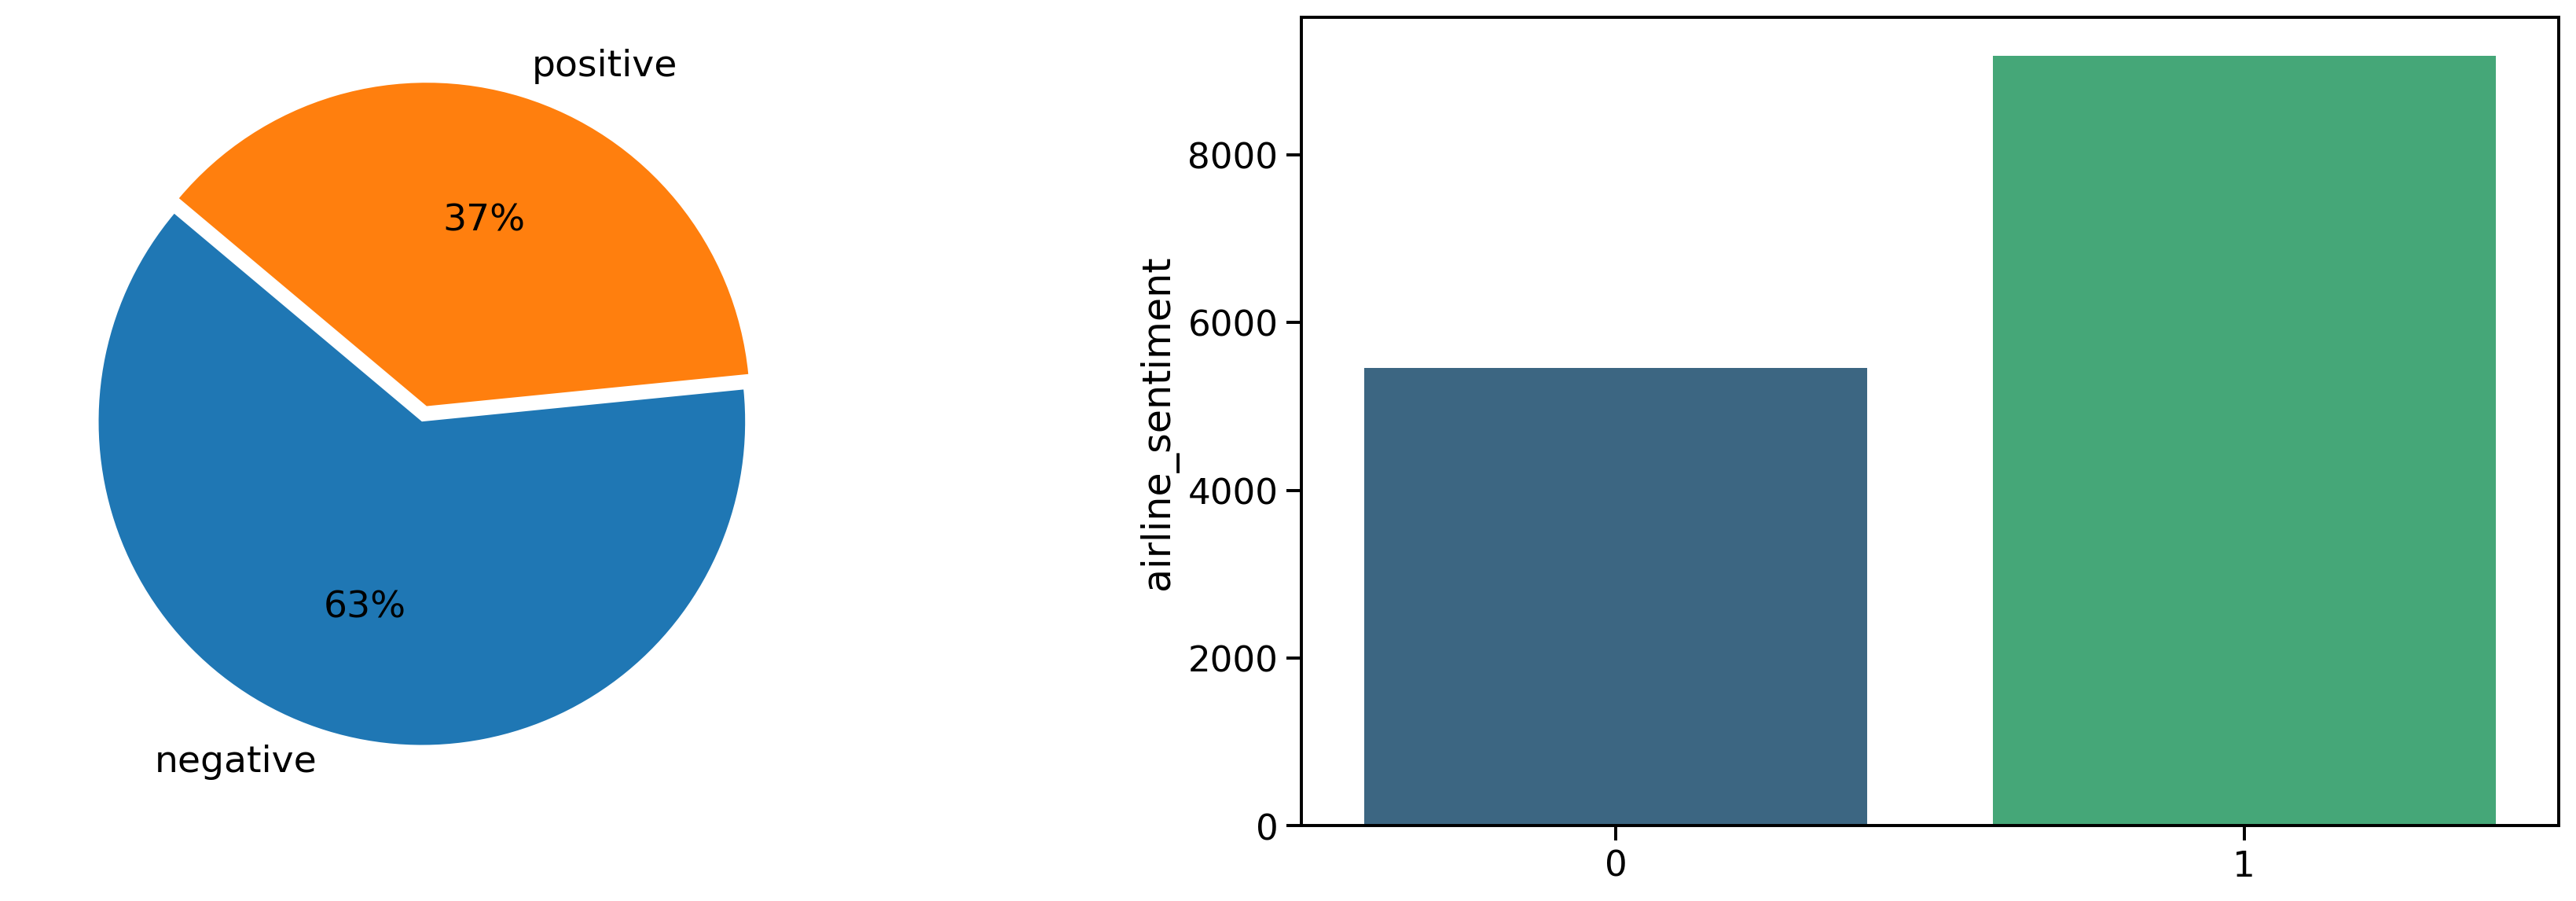

In [ ]:
labels = ['negative','positive']
sizes = [9178, 5462]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, autopct='%1.0f%%', explode=[0,0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = new_data['airline_sentiment'].unique(), y = new_data['airline_sentiment'].value_counts(), palette= 'viridis')

plt.show()

# Triage some of the irrelevant punctuation and other symbols in the corpus document,change all text to lower case, etc. 

In [ ]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
 

In [ ]:
data_h= pd.DataFrame()
data_l=pd.DataFrame

In [ ]:
data_h['text']=new_data['text']+new_data['airline']+new_data['airline_sentiment_confidence'].astype(str)
data_h['airline_sentiment']=new_data['airline_sentiment']

The above considers three features for finding the sentiment.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Removing punctuations, converting to lower case and stemming the words.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#Every mail starts with 'Subject :' will remove this from each text 

data_h['text']=data_h['text'].map(lambda text: text[1:])
data_h['text'] = data_h['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())
ps = PorterStemmer()
corpus=data_h['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

# Creating the Bag of Words model

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#Every mail starts with 'Subject :' will remove this from each text 


new_data['text'] = new_data['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())
ps = PorterStemmer()
corpus2=new_data['text'].apply(lambda text_list:' '.join(list(map(lambda word:ps.stem(word),(list(filter(lambda text:text not in set(stopwords.words('english')),text_list)))))))

# Creating the Bag of Words model

<ipython-input-21-82c7af87187d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['text'] = new_data['text'].map(lambda text:re.sub('[^a-zA-Z0-9]+', ' ',text)).apply(lambda x: (x.lower()).split())


# Convert the textual meta-data into a suitable (e.g. corpus) object. 

In [ ]:
corpus_h = pd.DataFrame()
corpus_h['text']=corpus
corpus_h['airline_sentiment']=new_data['airline_sentiment']
corpus_h.head()

,text,airline_sentiment
0,virginamerica dhepburn said virgin america1 0,1
1,virginamerica plu ad commerci experi tacki vir...,1
2,virginamerica today must mean need take anoth ...,1
3,virginamerica realli aggress blast obnoxi ente...,0
4,virginamerica realli big bad thing itvirgin am...,0


In [ ]:
corpus_l = pd.DataFrame()
corpus_l['text']=corpus2
corpus_l['airline_sentiment']=new_data['airline_sentiment']
corpus_l.head()

,text,airline_sentiment
0,virginamerica dhepburn said,1
1,virginamerica plu ad commerci experi tacki,1
2,virginamerica today must mean need take anoth ...,1
3,virginamerica realli aggress blast obnoxi ente...,0
4,virginamerica realli big bad thing,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
dtm_h  = vec.fit_transform(corpus_h['text'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
dtm_l  = vec.fit_transform(corpus_l['text'])

# Ignore those low frequency words and report the sparsity of your categorical data matrix with or without delete those low frequency words. 
Note that the sparsity of a matrix is the fraction: 
Sparsity(A) = number of zero-valued elements / total number of matrix elements (m×n). 

In [ ]:
print(f'No of terms in the document term matrix is {dtm_h.shape[1]}')
# Print the first 10 rows 

No of terms in the document term matrix is 15678


In [ ]:
five_percent_vectorizer1 = CountVectorizer(min_df = 0.05)
five_percent_document_term_matrix1 = five_percent_vectorizer1.fit_transform(corpus_h['text'])

print(f'No of terms in the the one percent document term matrix is {five_percent_document_term_matrix1.shape[1]}')

No of terms in the the one percent document term matrix is 23


The above deletes the terms  occuring in less than 5 % of the document of the higher dimension data.

In [ ]:
from numpy import count_nonzero
densemat=five_percent_document_term_matrix1.toarray()
sparsity = 1.0 - ( count_nonzero(densemat) / float(densemat.size) )
print('Sparsity of higher dimension matrix',sparsity)

Sparsity of higher dimension matrix 0.8848360655737705


Sparsity of the higher dimension data is 88.48%

In [ ]:
print(f'No of terms in the document term matrix is {dtm_l.shape[1]}')
# Print the first 10 rows 

No of terms in the document term matrix is 12000


In [ ]:
five_percent_vectorizer2 = CountVectorizer(min_df = 0.05)
five_percent_document_term_matrix2 = five_percent_vectorizer1.fit_transform(corpus_l['text'])

print(f'No of terms in the the one percent document for lower dimension is {five_percent_document_term_matrix2.shape[1]}')

No of terms in the the one percent document for lower dimension is 17


The above deletes the terms  occuring in less than 5 % of the document of the lower dimension data.

In [ ]:
from numpy import count_nonzero
densemat1=five_percent_document_term_matrix2.toarray()
sparsity = 1.0 - ( count_nonzero(densemat1) / float(densemat1.size) )
print('Sparsity of lower dimension matrix',sparsity)

Sparsity of lower dimension matrix 0.8774027643844423


Sparsity of the low dimension data is 87.7%

# Vectorising the attributes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#X_h = cv.fit_transform(dtm_l).toarray()
y_h = corpus_h['airline_sentiment'].values


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#X_l = cv.fit_transform(corpus_l['text']).toarray()
y_l = corpus_l['airline_sentiment'].values


# Building the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(five_percent_document_term_matrix1,y_h,random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(five_percent_document_term_matrix2,y_l,random_state=1)

# Applying Naive Bayes for higher and lower dimension data

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
predictions = naive_bayes.predict(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train1, y_train1)
predictions1 = naive_bayes.predict(X_test1)

Text(85.18, 0.5, 'predicted label')

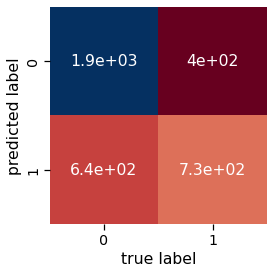

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(85.18, 0.5, 'predicted label')

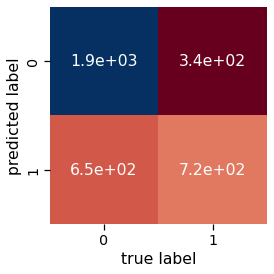

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test1, predictions1)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print('For Higher dimension')
print('Accuracy score: ', accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions, target_names=target_names))

For Higher dimension
Accuracy score:  0.7172131147540983
              precision    recall  f1-score   support

     class 0       0.75      0.83      0.79      2291
     class 1       0.65      0.54      0.59      1369

    accuracy                           0.72      3660
   macro avg       0.70      0.68      0.69      3660
weighted avg       0.71      0.72      0.71      3660



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print('For Lower dimension')
print('Accuracy score: ', accuracy_score(y_test1, predictions1))
print(classification_report(y_test1, predictions1, target_names=target_names))

For Lower dimension
Accuracy score:  0.7289617486338797
              precision    recall  f1-score   support

     class 0       0.75      0.85      0.80      2291
     class 1       0.68      0.53      0.59      1369

    accuracy                           0.73      3660
   macro avg       0.71      0.69      0.69      3660
weighted avg       0.72      0.73      0.72      3660



The above analysis shows Naive Bayes provides better accuracy on a lower dimension matrix compared to higher dimension matrix.

# Applying LDA for higher and lower dimension data

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
model = LinearDiscriminantAnalysis()
model.fit(X_train.toarray(), y_train)
y_lda1=model.predict(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
model = LinearDiscriminantAnalysis()
model.fit(X_train1.toarray(), y_train1)
y_lda2=model.predict(X_test1)

#Comparing the models on the basis of specificity, sensitivity and error

 \begin{aligned}{\text{sensitivity}}&={\frac {\text{number of true positives}}{{\text{number of true positives}}+{\text{number of false negatives}}}}\\[8pt]\\\end{aligned}

\begin{aligned}{\text{specificity}}&={\frac {\text{number of true negatives}}{{\text{number of true negatives}}+{\text{number of false positives}}}}\\\end{aligned}

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
tn1, fp1, fn1, tp1 = confusion_matrix(y_test1, predictions1).ravel()
tn2, fp2, fn2, tp2 = confusion_matrix(y_test,y_lda1).ravel()
tn3, fp3, fn3, tp3 = confusion_matrix(y_test1, y_lda2).ravel()

In [ ]:
def Specificity(tn0,fp0,fn0,tp0):
  spec= tn0 / (tn0+fp0)
  return spec

def Sensitivity(tn0,fp0,fn1,tp0):
  sen=tp0/(tp0+fn1)
  return sen

def error(y_test0,pred):
   err= 1-accuracy_score(y_test0,pred)
   return err

In [ ]:
print('For Naive Bayes - high dimension:')
print('Specificity is: ', Specificity(tn, fp, fn, tp))
print('Sensitivity is: ', Sensitivity(tn, fp, fn, tp))
print('Error is: ', error(y_test, predictions))

For Naive Bayes - high dimension:
Specificity is:  0.8254037538192929
Sensitivity is:  0.5361577794010226
Error is:  0.2827868852459017


In [ ]:
print('For LDA - high dimension:')
print('Specificity is: ', Specificity(tn2, fp2, fn2, tp2))
print('Sensitivity is: ', Sensitivity(tn2, fp2, fn2, tp2))
print('Error is: ', error(y_test,y_lda1))

For LDA - high dimension:
Specificity is:  0.8472282845918813
Sensitivity is:  0.537618699780862
Error is:  0.26857923497267755


In [ ]:
print('For Naive Bayes - low dimension:')
print('Specificity is: ', Specificity(tn1, fp1, fn1, tp1))
print('Sensitivity is: ', Sensitivity(tn1, fp1, fn1, tp1))
print('Error is: ', error(y_test1, predictions1))


For Naive Bayes - low dimension:
Specificity is:  0.8498472282845919
Sensitivity is:  0.5266617969320672
Error is:  0.27103825136612025


In [ ]:
print('For LDA - low dimension:')
print('Specificity is: ', Specificity(tn3, fp3, fn3, tp3))
print('Sensitivity is: ', Sensitivity(tn3, fp3, fn3, tp3))
print('Error is: ', error(y_test,y_lda2))

For LDA - low dimension:
Specificity is:  0.8502837189000436
Sensitivity is:  0.5573411249086925
Error is:  0.25928961748633883


Based on the above analysis we can infer the following:
1. The sparsity of a lower dimension data is lower thus having lesser zero valued elements compared to a higher dimension matrix.
2. The models show a higher accuracy on  lower dimension space as compared to a higher dimension space.
3. The Specificity and Sensitivity of LDA on a lower dimension model is the highest compared to other models.
4. Whereas the error is the least for LDA lower dimension model.
5. Hence LDA can be considered as the best model for predicting the sentiment of the tweets in the above example.